# Финальный проект. Декомпозиция

## Описание проекта

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в
приложении после 7 октября 2019 года.

Колонки в /datasets/mobile_sources.csv :
- userId — идентификатор пользователя,
- source — источник, с которого пользователь установил приложение.
<br>

Колонки в /datasets/mobile_dataset.csv :
- event.time — время совершения,
- user.id — идентификатор пользователя,
- event.name — действие пользователя.
<br>

Виды действий:
- advert_open — открыл карточки объявления,
- photos_show — просмотрел фотографий в объявлении,
- tips_show — увидел рекомендованные объявления,
- tips_click — кликнул по рекомендованному объявлению,
- contacts_show и show_contacts — посмотрел номер телефона,
- contacts_call — позвонил по номеру из объявления,
- map — открыл карту объявлений,
- search_1 — search_7 — разные действия, связанные с поиском по сайту,
- favorites_add — добавил объявление в избранное.

## Задачи проекта

1. Проанализировать связь целевого события — просмотра контактов — и других действий пользователей.
2. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.

## Цели

Анализ поведения пользователей приложения "Ненужные вещи" для увеличения конверсии в целевое действие, что в свою очередь увеличит вовлеченость

## Структура проекта




- __Знакомство с данными__
- __Предобработка данных__ 
    - Проверка дубликатов 
    - Проверка пропусков 
    - Типы данных
    - Названия столбцов
- __Иследовательский анализ данных__
    - Время проведеное в приложении
    - Retention Rate
- __Основные вопросы иследования__
    - В разрезе сессий отобрать сценарии, которые приводят к просмотру контактов
    - Строим воронки по основным сценариям в разрезе уникальных пользователей
    - Различия длитильности сессии с просмотром номера и без
    - Рассчитываем относительную частоту событий для тех кто смотрел контакты и тех кто не смотрел
    


- __Проверка гипотиз__
    - Одни пользователи совершают действия tips_show и tips_click, другие – только tips_show. Проверить гипотезу, что конверсия в просмотр контактов различается у этих двух групп.
    - Различается ли конверсия в целевое действие пользователей, которые добавляют объявление в избраное, от тех кто не добавляет.

## Знакомство с данными

Импортируем необходимые библиотеки

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Далее загружаем датасеты и смотрим по пять строк каждого из них

In [192]:
dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')

In [193]:
dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [194]:
sources

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


Смотрим основную информацию 

In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [196]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


### Вывод

## Предобработка данных

### Проверка дубликатов

Проверим на полные дубликаты

In [197]:
dataset.duplicated().sum()

0

И вторую таблицу тоже

In [198]:
sources.duplicated().sum()

0

Полные дубликаты отсутствуют в обеих таблицах. В столбце event_name у нас есть такие действия как contacts_show и show_contacts. Так как это одно и тоже, объединим их в одно целое.

In [199]:
dataset['event.name'] = dataset['event.name'].replace('show_contacts','contacts_show')

## Проверка пропусков

In [200]:
dataset.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [201]:
sources.isna().sum()

userId    0
source    0
dtype: int64

Не в одной из таблиц пропусков нет.

## Типы данных

У нас есть столбец с датой и веременем совершения пользователем того или иного действия. Столбец имеет тип данных object. И так как данные в столбце event.time до милисикунд, предлогаю их округлить до секунд. Такая точность нам вряд ли понадобится.

In [202]:
dataset['event.time'] = pd.to_datetime(dataset['event.time']).dt.round("s")

## Названия столбцов

Приводим название столбцов в snake case

In [203]:
dataset.columns=['event_time','event_name','user_id']

In [204]:
dataset

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:30,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [205]:
sources = sources.rename(columns={'userId': 'user_id'})

In [206]:
sources

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


### Объединение таблиц

Для удобства работы объеденим две таблицы в одну

In [207]:
df = dataset.merge(sources,on='user_id',how='left')
df

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:30,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


### Вывод

## Иследовательский анализ

### Время проведеное в приложении

Для начала посмотрим сколько всего времяни провели пользователи в нашем приложении за все время. И в первую очередь данными за какой временой промежуток мы распологаем.

In [208]:
df['event_time'].min()

Timestamp('2019-10-07 00:00:00')

In [209]:
df['event_time'].max()

Timestamp('2019-11-03 23:58:13')

Итак с 07.10.2019 по 03.11.2019. 28 дней или 4 недели. Добавим столбец в котором будет только дата, без времени.

In [210]:
df['event_date'] = pd.to_datetime(dataset['event_time']).dt.round("d") # добвавляем столбец с датой

Далее начинем выделять сессии. Для этог воспользуемя способом который был в презентации, соответсвенно сессии выделяем по тайм-ауту

In [211]:
df = df.sort_values(['user_id', 'event_time']) # сортируем

In [212]:
get_sessions = (df.groupby('user_id')['event_time'].diff() >= pd.Timedelta('20Min')).cumsum() # Этот код взят из пачки/stackoverflow
df['session_id'] = df.groupby(['user_id', get_sessions], sort=False).ngroup() + 1
df

,event_time,event_name,user_id,source,event_date,session_id
805,2019-10-07 13:39:46,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
809,2019-10-07 13:41:06,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
820,2019-10-07 13:43:21,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
830,2019-10-07 13:45:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
...,...,...,...,...,...,...
72584,2019-11-03 15:51:24,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72589,2019-11-03 15:51:58,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72684,2019-11-03 16:07:41,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976


Столбец с id сессии добавлен. Теперь создадим таблицу в которой будут id сессии, дата начала и конца сессии, а также ее продолжительность

In [213]:
session_time = df.groupby('session_id')['event_time'].agg(['min','max']) # Строим таблицу с датой начала и конца сессии
session_time['time'] = round((session_time['max'] - session_time['min']).dt.seconds/60,0) # добавляем столбк сколько минут длилась сессия
session_time = session_time.reset_index() 
session_time
# Блин ну дальше по этому пункту должно быть легко
# Значит посчитаем среднюю продолжительность сессии
# Потом общее время которое пользователи провели в приложении 
# Также посмотрим максимальное время
# Возможно еще раскидаем по времени суток

,session_id,min,max,time
0,1,2019-10-07 13:39:46,2019-10-07 13:49:42,10.0
1,2,2019-10-09 18:33:56,2019-10-09 18:42:23,8.0
2,3,2019-10-21 19:52:31,2019-10-21 20:07:30,15.0
3,4,2019-10-22 11:18:15,2019-10-22 11:30:53,13.0
4,5,2019-10-19 21:34:34,2019-10-19 21:59:55,25.0
...,...,...,...,...
10971,10972,2019-11-02 01:16:49,2019-11-02 01:16:49,0.0
10972,10973,2019-11-02 18:01:27,2019-11-02 18:17:41,16.0
10973,10974,2019-11-02 19:25:54,2019-11-02 19:30:50,5.0
10974,10975,2019-11-03 14:32:56,2019-11-03 14:48:44,16.0


Таблица готова. Посмотрим информацию о ней с помощью info()

In [214]:
session_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  10976 non-null  int64         
 1   min         10976 non-null  datetime64[ns]
 2   max         10976 non-null  datetime64[ns]
 3   time        10976 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 343.1 KB


Как можно увидеть 10976 строк что ровняется количеству сессий. Типы данных у всех столбцов верные. Далее посмотрим на данные с помощью функции describe.

In [215]:
session_time['time'].describe().to_frame()

,time
count,10976.000000
mean,10.797649
std,16.112926
min,0.000000
25%,0.000000
50%,5.000000
75%,15.000000
max,234.000000


Сдесь картина выресовыветься страная. Видимо слишком много сессий чья продолжительность ровна нулю. Предлогаю отфильтровать данные.

In [216]:
session_time = session_time.query('time > 0') # фильтруем нули

Повторно применяем функцию desribe

In [217]:
session_time['time'].describe().to_frame()

,time
count,7936.000000
mean,14.933846
std,17.242838
min,1.000000
25%,4.000000
50%,10.000000
75%,20.000000
max,234.000000


Теперь картина выглядит более адекватно. Построим ящик с усами.

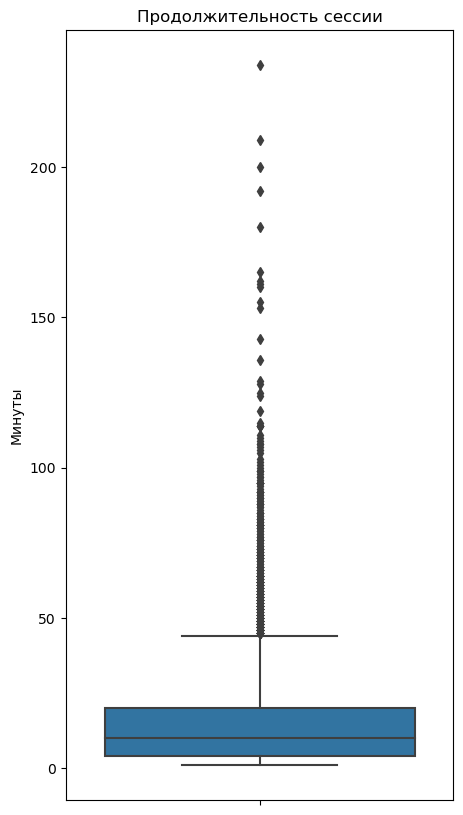

In [218]:
fig, ax = plt.subplots(figsize = (5,10))
sns.boxplot(y='time', data=session_time)
plt.title('Продолжительность сессии')
plt.ylabel('Минуты')
plt.show() 

Посмотрим на этот график в другом маштабе

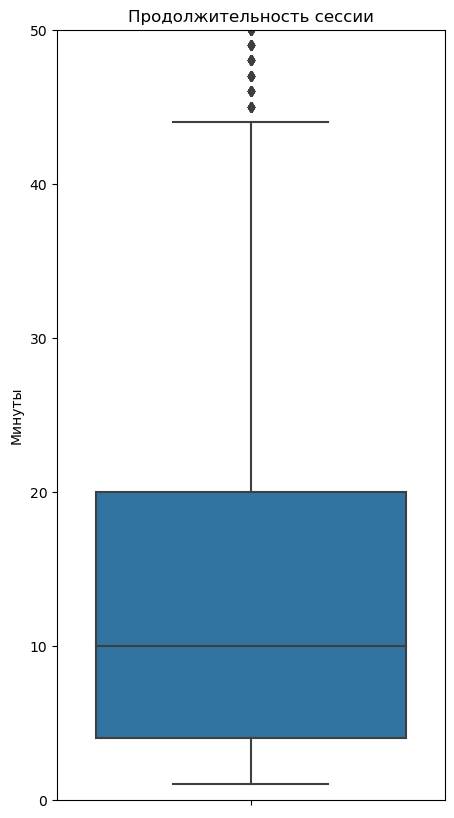

In [219]:
fig, ax = plt.subplots(figsize = (5,10))
sns.boxplot(y='time', data=session_time)
ax.set(ylim=(0, 50))
plt.title('Продолжительность сессии')
plt.ylabel('Минуты')
plt.show() 

Итак из этой картины становиться ясно что минимальная длина сессии 1 минута, а максимальная 234 минуты. Средняя продолжительность сессии 15 минут. Большенство сессий длятся от 5 до 20 минут.

### Retention Rate

Retention Rate — важнейший показатель для компаний, которые зарабатывают с пользователей напрямую. Например, для интернет-магазинов или сервисов, работающих по подписке. Ведь чем дольше привлечённый рекламой или другими способами клиент пользуется продуктом, тем больше потенциальная выручка.

Чтобы рассчитать Retention Rate, количество активных пользователей на текущий день делят на количество активных пользователей на первый день.

### Профили пользователей

In [220]:
# код взять из урока по расчету ratention rate в python

def get_profiles(df):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        df.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first','event_name' : 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['date'] = pd.to_datetime(profiles['first_ts'].dt.strftime('%Y-%m-%d')) 
    profiles['week'] = profiles['first_ts'].dt.week
    
    return profiles

In [221]:
df

,event_time,event_name,user_id,source,event_date,session_id
805,2019-10-07 13:39:46,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
809,2019-10-07 13:41:06,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
820,2019-10-07 13:43:21,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
830,2019-10-07 13:45:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-08,1
...,...,...,...,...,...,...
72584,2019-11-03 15:51:24,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72589,2019-11-03 15:51:58,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72684,2019-11-03 16:07:41,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-04,10976


Далее применим эту функцию и создадим таблицу с профилями

In [222]:
profiles = get_profiles(df)
profiles.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11820\577203037.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  profiles['week'] = profiles['first_ts'].dt.week


,user_id,first_ts,source,event_name,date,week
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,other,tips_show,2019-10-07,41
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,yandex,search_1,2019-10-19,42
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,yandex,photos_show,2019-11-01,44
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,google,search_7,2019-10-18,42
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex,contacts_show,2019-10-25,43


In [223]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4293 non-null   object        
 1   first_ts    4293 non-null   datetime64[ns]
 2   source      4293 non-null   object        
 3   event_name  4293 non-null   object        
 4   date        4293 non-null   datetime64[ns]
 5   week        4293 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 201.4+ KB


In [224]:
# расчитываем Retention rate
def get_retention(
    profiles, df, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('date <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        df[['user_id', 'event_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['date'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('date')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='date', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [225]:
#observation_date = datetime(2019, 11, 3).date()
horizon_days = 14

retention_raw, retention = get_retention(
    profiles, df, datetime(2019, 11, 3).date(), 14
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
date,,,,,,,,,,,,,,,
2019-10-07,204,1.0,0.122549,0.098039,0.107843,0.053922,0.039216,0.058824,0.078431,0.053922,0.049020,0.049020,0.034314,0.024510,0.058824
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892,0.071856,0.059880,0.041916,0.059880,0.023952,0.029940,0.035928
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818,0.073864,0.062500,0.034091,0.022727,0.028409,0.034091,0.056818
2019-10-10,174,1.0,0.091954,0.103448,0.080460,0.097701,0.080460,0.068966,0.051724,0.080460,0.034483,0.034483,0.051724,0.045977,0.040230
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.073529,0.044118,0.014706,0.044118,0.036765,0.036765,0.051471,0.036765
2019-10-12,125,1.0,0.128000,0.160000,0.056000,0.064000,0.088000,0.080000,0.088000,0.080000,0.064000,0.064000,0.040000,0.072000,0.048000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054,0.047297,0.047297,0.047297,0.040541,0.040541,0.047297,0.047297
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.054054,0.043243,0.075676,0.037838,0.037838,0.048649,0.016216,0.064865
2019-10-15,186,1.0,0.139785,0.091398,0.080645,0.053763,0.053763,0.080645,0.075269,0.064516,0.021505,0.037634,0.037634,0.032258,0.037634


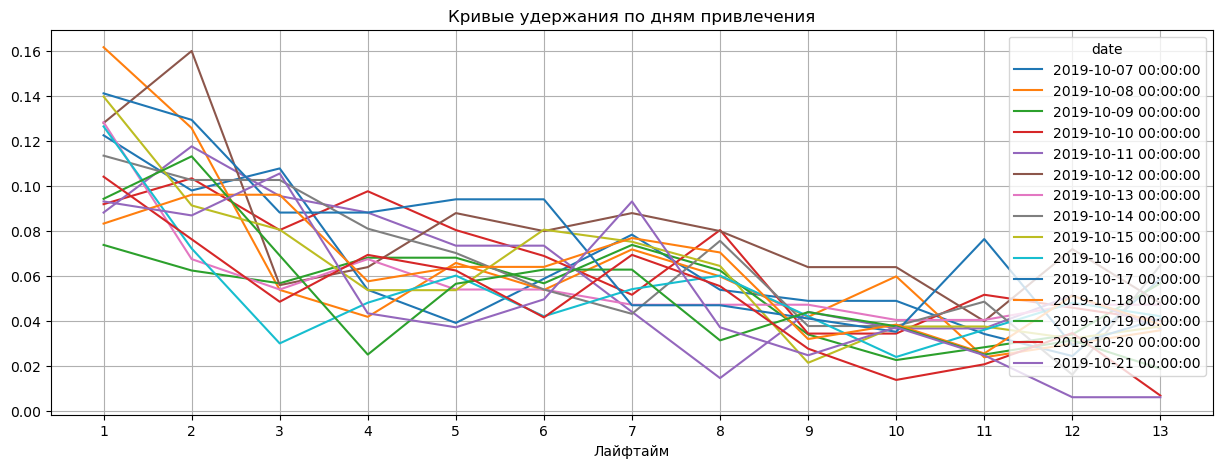

In [226]:
report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

### Удержание в динамике

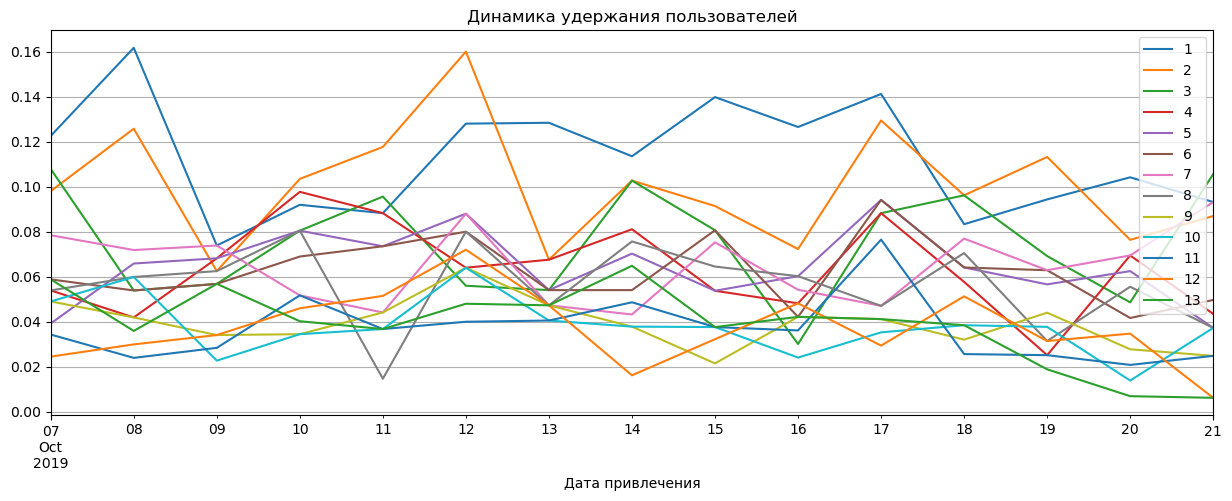

In [227]:
# строим графики изменений

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

## Основные вопросы иследования

### В разрезе сессий отобрать сценарии, которые приводят к просмотру контактов

Так как сессии мы уже выделели на этапе когда изучали время поведенное в приложении, начинаем с веделения сценариев использования.

### 2

### 3

### 4

## Проверка гипотез 

### Первая

### Вторая

## Вывод